In [1]:
#Setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load data
train_data = pd.read_csv("C:/Users/hogun/Desktop/ML work/Titanic from Kaggle/train.csv")
test_data = pd.read_csv("C:/Users/hogun/Desktop/ML work/Titanic from Kaggle/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check the features; how many of which are missing
train_data.info()
print('= '*30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  --

In [5]:
#Age, Cabin, and Embarked have missing values in the training data. 
#Age, Fare, and Cabin have missing values in the test data.

In [6]:
# Check for correlation between discrete features and survival rate

train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Correlation: survival rate higher if ticket class is higher; people of upper clas had a higher survival rate

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Correlation: survival rate higher if female

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#No siginificant correlation observed.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#No siginificant correlation observed.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [10]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Embarking from Cherbourg has a higher survival rate. The others negligible.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
#Perform EDA with continuous features: Age & Fare

Text(0, 0.5, 'Count')

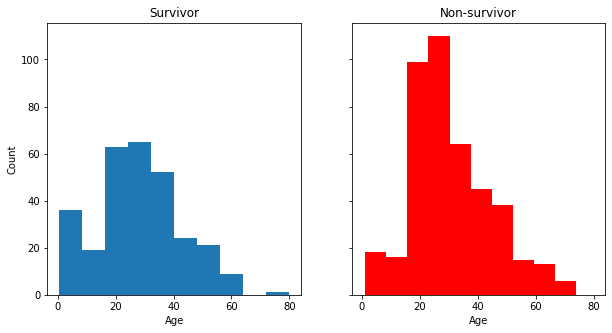

In [12]:
survivors = train_data[train_data.Survived==1]
nsurvivors = train_data[train_data.Survived==0]
x1 = survivors["Age"]
x2 = nsurvivors["Age"]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax1.hist(x1)
ax2.hist(x2, color = "r")
ax1.set_title("Survivor")
ax2.set_title("Non-survivor")
ax1.set_xlabel("Age")
ax2.set_xlabel("Age")
ax1.set_ylabel("Count")
#Observations:
#Young children aged between 1 and 10 had a high chance of survival.
#Most of those aged between 15 and 30 did not survive.
#Most passengers were aged between 20 and 40.

Text(0, 0.5, 'Count')

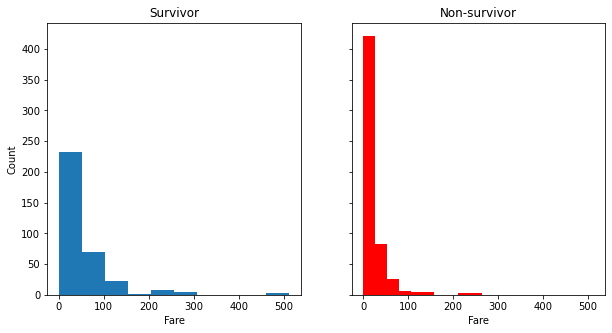

In [13]:
x3 = survivors["Fare"]
x4 = nsurvivors["Fare"]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax1.hist(x3)
ax2.hist(x4, color = "r")
ax1.set_title("Survivor")
ax2.set_title("Non-survivor")
ax1.set_xlabel("Fare")
ax2.set_xlabel("Fare")
ax1.set_ylabel("Count")
#Observations:
#High-paying passengers had a higher survival rate

In [14]:
#Drop features that are not deemed helpful, such as Name, Ticket and Cabin
train_data = train_data.drop(["Name", "Ticket", "Cabin"], axis=1)
test_data = test_data.drop(["Name", "Ticket", "Cabin"], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
#For features with missing values:
#Fill in missing Age with the median number
train_data["Age"].fillna(train_data["Age"].median(), inplace = True)
test_data["Age"].fillna(test_data["Age"].median(), inplace = True)
#Fill in missing Embarked with its mode
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace = True)
#Fill in missing Fare with the median number
test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)

    
print(train_data.isnull().sum())
print('= '*30)
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [16]:
#Feature engineering:
#SibSp and Parch not useful so create a family size feature to generalize, and add another new feature to signify whether the person was a solo traveller.
#combine SibSp and Parch to create FamilySize
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
#create Alone to indicate solo travellers
train_data["Alone"] = 1
train_data["Alone"].loc[train_data["FamilySize"] > 1] = 0
test_data["Alone"] = 1
test_data["Alone"].loc[test_data["FamilySize"] > 1] = 0

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,1


In [17]:
#Age and Fare are continuous features so transform them into categorical features; bands of values
train_data["FareBand"] = pd.qcut(train_data["Fare"], 4)
test_data["FareBand"] = pd.qcut(test_data["Fare"], 4)
train_data["AgeBand"] = pd.cut(train_data["Age"].astype(int), 5)
test_data["AgeBand"] = pd.cut(test_data["Age"].astype(int), 5)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,FareBand,AgeBand
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,"(7.91, 14.454]","(32.0, 48.0]"


In [18]:
#Encode the categoroical features
le = LabelEncoder()
train_data["SexCode"] = le.fit_transform(train_data["Sex"])
train_data["EmbarkedCode"] = le.fit_transform(train_data["Embarked"])
train_data["FareBandCode"] = le.fit_transform(train_data["FareBand"])
train_data["AgeBandCode"] = le.fit_transform(train_data["AgeBand"])

test_data["SexCode"] = le.fit_transform(test_data["Sex"])
test_data["EmbarkedCode"] = le.fit_transform(test_data["Embarked"])
test_data["FareBandCode"] = le.fit_transform(test_data["FareBand"])
test_data["AgeBandCode"] = le.fit_transform(test_data["AgeBand"])

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,FareBand,AgeBand,SexCode,EmbarkedCode,FareBandCode,AgeBandCode
0,892,3,male,34.5,0,0,7.8292,Q,1,1,"(-0.001, 7.896]","(30.4, 45.6]",1,1,0,2
1,893,3,female,47.0,1,0,7.0000,S,2,0,"(-0.001, 7.896]","(45.6, 60.8]",0,2,0,3
2,894,2,male,62.0,0,0,9.6875,Q,1,1,"(7.896, 14.454]","(60.8, 76.0]",1,1,1,4
3,895,3,male,27.0,0,0,8.6625,S,1,1,"(7.896, 14.454]","(15.2, 30.4]",1,2,1,1
4,896,3,female,22.0,1,1,12.2875,S,3,0,"(7.896, 14.454]","(15.2, 30.4]",0,2,1,1


In [19]:
#Define variables to be used
y = ["Survived"]
XFeatures = ["Pclass", "FamilySize", "Alone", "SexCode", "EmbarkedCode", "FareBandCode", "AgeBandCode"]

In [20]:
#train-test-split for model selection(make a validation set from the training set)
X_train, X_val, y_train, y_val = train_test_split(train_data[XFeatures], train_data[y], shuffle=True, random_state=1)
X_train.head()

,Pclass,FamilySize,Alone,SexCode,EmbarkedCode,FareBandCode,AgeBandCode
35,1,2,0,1,2,3,2
46,3,2,0,1,1,2,1
453,1,2,0,1,0,3,3
291,1,2,0,0,0,3,1
748,1,2,0,1,2,3,1


In [21]:
#Modelling
#logistic regression
logireg = LogisticRegression()
logireg.fit(X_train, y_train)
logireg.score(X_train, y_train)

0.8068862275449101

In [22]:
#Support vector machine
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.8383233532934131

In [23]:
#linear SVC
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
linsvc.score(X_train, y_train)

0.7994011976047904

In [24]:
#K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8383233532934131

In [25]:
#Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.8862275449101796

In [26]:
#Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8847305389221557

In [32]:
xg = XGBClassifier(verbosity = 0)
xg.fit(X_train, y_train)
xg.score(X_train, y_train)

0.8817365269461078

In [28]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_train, y_train)

0.8667664670658682

In [35]:
#With default settings, Random Forest model produced the highest score with the training set, and it accounts for overfitting problem of decision tree classifier.
#Perform hyperparameter tuning with several algorithms with high scores, using grid search CV

In [30]:
#Hyperparameter tuning with random forest
param_grid = [{"n_estimators": [10, 50, 100, 200, 300],
               "criterion": ["gini", "entropy"],
               "max_depth": [1, 2, 3, 4, 5, 6, None]}]

gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 1),
                  param_grid = param_grid,
                  refit = True,
                  cv = 10,
                  n_jobs = None)

grid_results = gs.fit(X_train, y_train)
best_grid = grid_results.best_estimator_

print("Best Accuracy: %.4f" % (best_grid.score(X_val, y_val)))
print("Best Params: ", gs.best_params_)

Best Accuracy: 0.7892
Best Params:  {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}


In [33]:
#Hyperparameter tuning with XGBoost
param_grid = [{"n_estimators": [10, 50, 100, 200, 300],
               "max_depth": [2, 3, 4, 5, 6, 7, None],
               "tree_method": ["exact", "approx", "hist"]}]

gs = GridSearchCV(estimator = XGBClassifier(random_state = 1, verbosity = 0),
                  param_grid = param_grid,
                  refit = True,
                  cv = 10,
                  n_jobs = None)

grid_results = gs.fit(X_train, y_train)
best_grid = grid_results.best_estimator_

print("Best Accuracy: %.4f" % (best_grid.score(X_val, y_val)))
print("Best Params: ", gs.best_params_)

Best Accuracy: 0.7758
Best Params:  {'max_depth': 3, 'n_estimators': 10, 'tree_method': 'exact'}


In [34]:
#Hyperparameter tuning with LightGBM
param_grid = [{"n_estimators": [10, 50, 100, 200, 300],
               "num_leaves": [10, 20, 31, 40],
               "max_depth": [1, 2, 3, 4, 5, 6, -1]}]

gs = GridSearchCV(estimator = LGBMClassifier(random_state = 1),
                  param_grid = param_grid,
                  refit = True,
                  cv = 10,
                  n_jobs = None)

grid_results = gs.fit(X_train, y_train)
best_grid = grid_results.best_estimator_

print("Best Accuracy: %.4f" % (best_grid.score(X_val, y_val)))
print("Best Params: ", gs.best_params_)

Best Accuracy: 0.7758
Best Params:  {'max_depth': 3, 'n_estimators': 50, 'num_leaves': 10}


In [40]:
#Algorithm of choice: Random Forest
#Tune with the best parameter shown above ('criterion': 'gini', 'max_depth': 4, 'n_estimators': 200)
#Fit the model with the entire train dataset (train + validation) and predict with test data
chosenmodel = RandomForestClassifier(criterion = "gini",
                                     max_depth = 4,
                                     n_estimators = 200,
                                     random_state = 1)

chosenmodel.fit(train_data[XFeatures], train_data[y])
finalpredictions = chosenmodel.predict(test_data[XFeatures])

In [43]:
#Produce CSV file nad submit!
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],
                           "Survived": finalpredictions})
submission.to_csv("submission.csv", index = False)